In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('dataset.csv', sep=';')
df["Arrondissement"] = df["Numéro INSEE du quartier"].astype(str).str[3:5].astype(int)
df = df.drop(['Secteurs géographiques', 'Numéro du quartier', 'geo_shape','Ville', 'geo_point_2d', 'Loyers de référence majorés', 'Loyers de référence minorés', 'Numéro INSEE du quartier', 'Nom du quartier', 'Epoque de construction'], axis=1)
df['Type de location'] = df['Type de location'].replace({'non meublé': 0, 'meublé': 1})
df.head()

,Année,Nombre de pièces principales,Type de location,Loyers de référence,Arrondissement
0,2024,3,0,23.7,4
1,2024,4,1,23.4,13
2,2024,1,0,29.6,3
3,2024,1,1,30.8,10
4,2024,4,1,22.6,11


<Axes: >

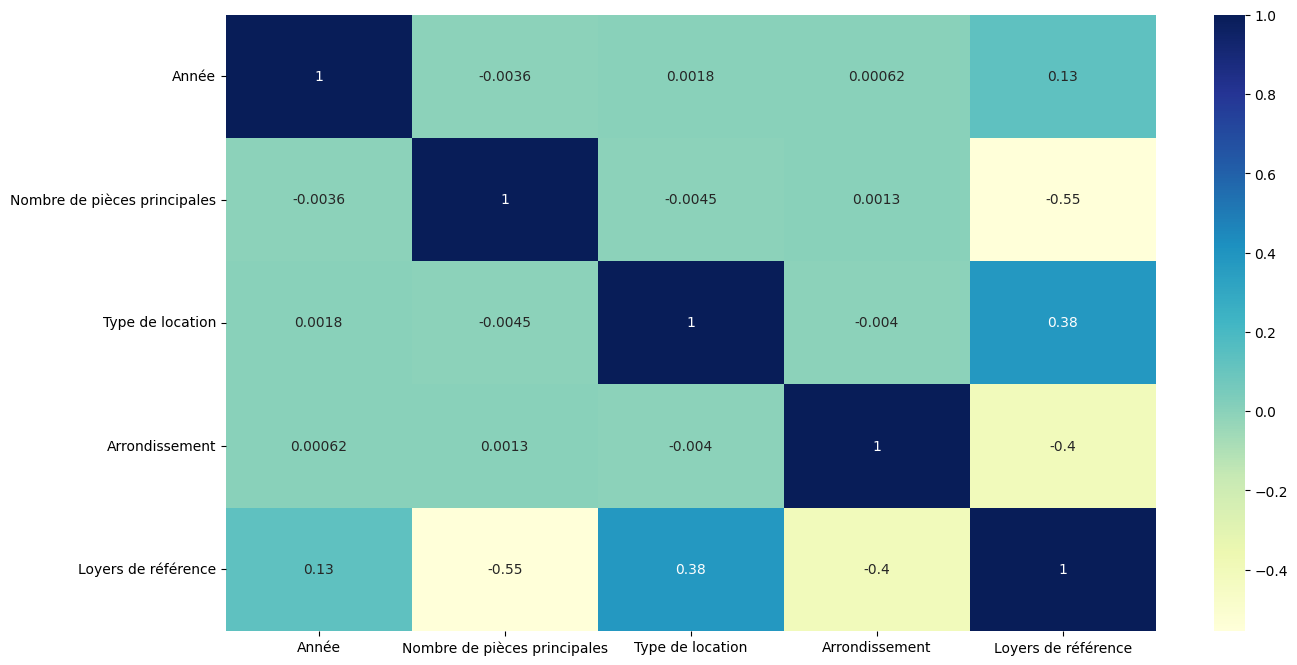

In [2]:
from sklearn.model_selection import train_test_split

X = df.drop(['Loyers de référence'], axis=1)
y = df['Loyers de référence']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size= 0.2)
train_df = X_train.join(y_train)
plt.figure(figsize=(15,8))
sns.heatmap(train_df.corr(), annot=True, cmap='YlGnBu')

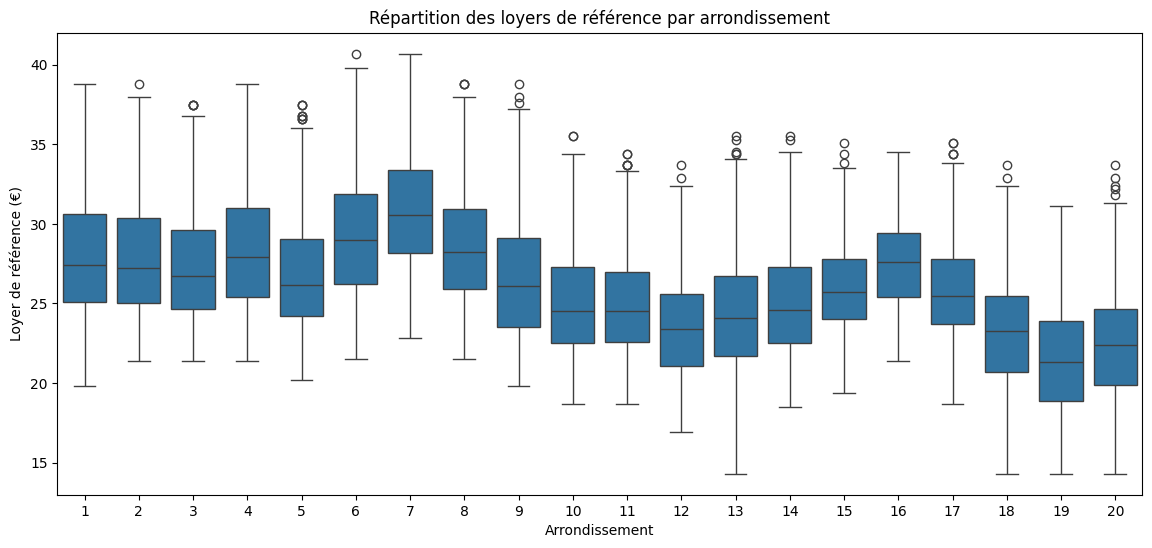

In [3]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="Arrondissement", y="Loyers de référence")
plt.title("Répartition des loyers de référence par arrondissement")
plt.xlabel("Arrondissement")
plt.ylabel("Loyer de référence (€)")
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X_train, y_train = train_df.drop(['Loyers de référence'], axis=1), train_df['Loyers de référence']
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)

print("R² score :", r2_score(y_test, y_pred))
print("RMSE :", mean_squared_error(y_test, y_pred, squared=False))


R² score : 0.6178250028765468
RMSE : 2.6449312621033956
